# Data processing and visualization tools

The following tutorial will explore two different tools that works over the data. The fist one (Pandas) deals with the data preprocessing and the second one (Matplotlib) is in charge of the data visualization.

## Data preprocessing
The data preprocessing is a very important process for techniques like machine leanrning. This tutorial will describe the data preprocessing using Pandas. The dataset used is the "chronic_kidney_disease.arff" from the UCI. The first lets import Numpy and Pandas library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

After importing the necessary libraries, the next step is read the dataset.

In [2]:
# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']
# read the dataset
df = pd.read_csv("datasets/chronic_kidney_disease.arff",
        header=None,
        names=header
       )

Then is convenient clean a little the data.

In [3]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# print total samples
print("Total samples:", len(df))
# print 4-rows and 6-columns
print("Partial data\n", df.iloc[0:4, 0:6])

Total samples: 157
Partial data
    age  bp     sg al su       rbc
30  48  70  1.005  4  0    normal
36  53  90  1.020  2  0  abnormal
38  63  70  1.010  3  0  abnormal
41  68  80  1.010  3  2    normal


The principla components analisys (PCA) is a method that helps with the reduction of the dataset dimension. Let's perfrom a PCA analysis using Pandas:

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


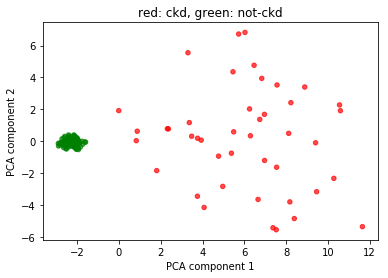

In [4]:
# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']
# read the dataset
df = pd.read_csv("datasets/chronic_kidney_disease.arff",
        header=None,
        names=header
       )

# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

targets = df['classification'].astype('category')
# save target-values as color for plotting
# red: disease,  green: no disease
label_color = ['red' if i=='ckd' else 'green' for i in targets]

# list of categorical features
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]

# drop the "categorical" features
# drop the classification column
df = df.drop(labels=['classification'], axis=1)
# drop using 'inplace' which is equivalent to df = df.drop()
# df.drop(labels=categorical_, axis=1, inplace=True)

# convert categorical features into dummy variable
df = pd.get_dummies(df, columns=categorical_)

# StandardScaler: mean=0, variance=1
df = preprocessing.StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(T)

# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

Now we will try to remove the outliers of the dataset.

In [5]:
# Example Dataset
df = pd.DataFrame({'Data':np.random.normal(size=200)}) 
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]

## Data visualization

In this section we will present some Matplotlib examples.

### Histograms

In [6]:
np_data=pd.read_csv('datasets/national_parks.csv')

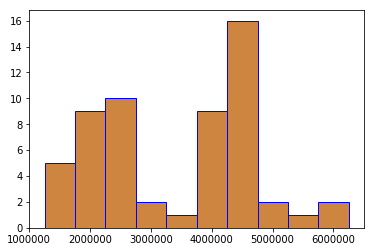

In [7]:
plt.hist(np_data['GrandCanyon'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.show()

### Pie Chart

In [8]:
t_mov= pd.read_csv('datasets/types_movies.csv')

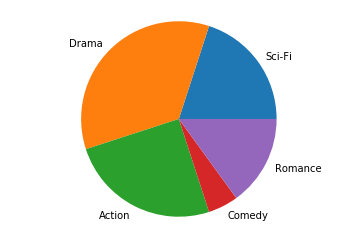

In [9]:
plt.pie(t_mov['Percentage'], 
        labels=t_mov['Sector'])

plt.axis('equal')

plt.show()

### Time Series

In [10]:
stock_data = pd.read_csv('datasets/stocks.csv')

In [11]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head()

,Date,AAPL,ADBE,CVX,GOOG,IBM,MDLZ,MSFT,NFLX,ORCL,SBUX
0,2007-01-03,11.107141,38.869999,50.777351,251.001007,79.242500,17.519524,24.118483,3.258571,15.696321,15.752188
1,2007-02-01,10.962033,39.250000,48.082939,224.949951,74.503204,16.019426,22.092464,3.218571,15.028588,13.930813
2,2007-03-01,12.037377,41.700001,51.900383,229.309311,75.561348,16.009354,21.857189,3.312857,16.583584,14.138198
3,2007-04-02,12.930043,41.560001,54.588032,235.925919,81.934280,16.924608,23.480597,3.167143,17.196436,13.984914
4,2007-05-01,15.701322,44.060001,57.598267,249.204208,85.786057,17.111704,24.146753,3.128572,17.726965,12.988567


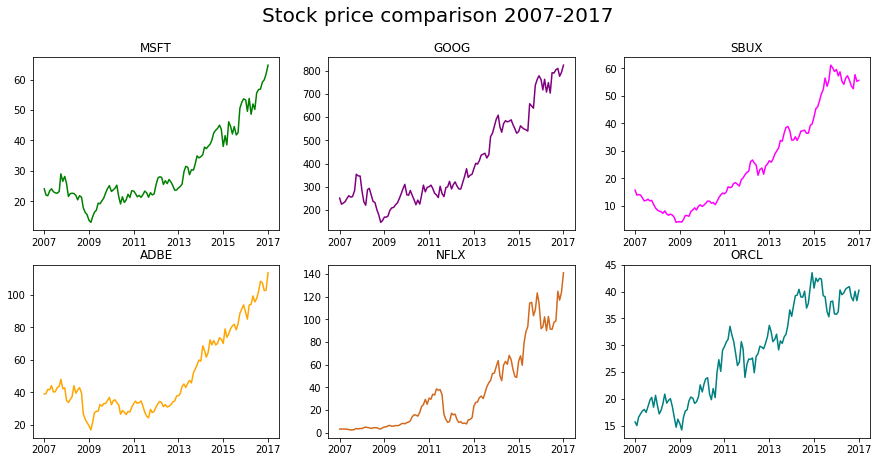

In [12]:
# Figsize for width and height of plot
fig = plt.figure(figsize=(15,7))

fig.suptitle('Stock price comparison 2007-2017', 
             fontsize=20)

ax1 = fig.add_subplot(231)
ax1.set_title('MSFT')

ax1.plot(stock_data['Date'],
         stock_data['MSFT'], 
         color='green')

ax2 = fig.add_subplot(232)
ax2.set_title('GOOG')

ax2.plot(stock_data['Date'],
         stock_data['GOOG'], 
         color='purple')

ax3 = fig.add_subplot(233)
ax3.set_title('SBUX')

ax3.plot(stock_data['Date'],
         stock_data['SBUX'], 
         color='magenta')

ax4 = fig.add_subplot(234)
ax4.set_title('ADBE')

ax4.plot(stock_data['Date'],
         stock_data['ADBE'], 
         color='orange')

ax4 = fig.add_subplot(235)
ax4.set_title('NFLX')

ax4.plot(stock_data['Date'],
         stock_data['NFLX'], 
         color='chocolate')

ax4 = fig.add_subplot(236)
ax4.set_title('ORCL')

ax4.plot(stock_data['Date'],
         stock_data['ORCL'], 
         color='teal')

plt.show()

### Scatterplot

In [13]:
countries=pd.read_csv('datasets/countries.csv')

In [14]:
data_2007=countries[countries['year']==2007]

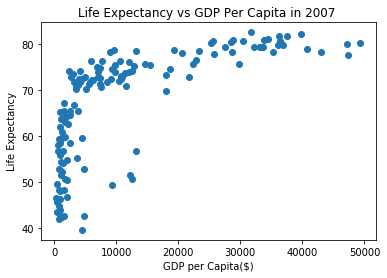

In [15]:
plt.scatter(data_2007['gdpPerCapita'],data_2007['lifeExpectancy'])
plt.title('Life Expectancy vs GDP Per Capita in 2007 ')
plt.xlabel('GDP per Capita($)')
plt.ylabel('Life Expectancy')
plt.show()